# Customer Shopping Trends EDA/ML Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
# warnings.filterwarnings('ignore')

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/dude/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1


In [3]:
os.listdir(path)

['shopping_trends.csv']

In [4]:
df = pd.read_csv(path + '/shopping_trends.csv')
df.drop('Customer ID', axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=1)

# Make sure data is split correctly
print(f"Train Shape {train_df.shape}")
print(f"Test Shape {test_df.shape}")
print(f"Validation Shape{val_df.shape}")

Train Shape (3120, 18)
Test Shape (390, 18)
Validation Shape(390, 18)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 3304 to 1061
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Gender                    3120 non-null   object 
 2   Item Purchased            3120 non-null   object 
 3   Category                  3120 non-null   object 
 4   Purchase Amount (USD)     3120 non-null   int64  
 5   Location                  3120 non-null   object 
 6   Size                      3120 non-null   object 
 7   Color                     3120 non-null   object 
 8   Season                    3120 non-null   object 
 9   Review Rating             3120 non-null   float64
 10  Subscription Status       3120 non-null   object 
 11  Payment Method            3120 non-null   object 
 12  Shipping Type             3120 non-null   object 
 13  Discount Applied          3120 non-null   object 
 14  Promo Code

In [7]:
train_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3304,30,Female,Handbag,Accessories,79,Mississippi,XL,Orange,Fall,4.8,No,Debit Card,Next Day Air,No,No,36,Bank Transfer,Every 3 Months
2756,42,Female,Hat,Accessories,23,Minnesota,L,Violet,Winter,4.1,No,Bank Transfer,Free Shipping,No,No,41,PayPal,Monthly
516,34,Male,Hoodie,Clothing,41,West Virginia,L,Indigo,Fall,2.8,Yes,Cash,2-Day Shipping,Yes,Yes,19,Debit Card,Bi-Weekly
3621,38,Female,Sneakers,Footwear,32,New Jersey,XL,Silver,Summer,4.0,No,Venmo,2-Day Shipping,No,No,5,Cash,Fortnightly
2872,63,Female,Jewelry,Accessories,48,Connecticut,L,Olive,Fall,2.6,No,Venmo,Next Day Air,No,No,5,Cash,Annually


## Plans

1. <b>Do simple EDA try and answer some questions:</b>
    <br>- What are the most common payment types?
    <br>- Which seasons lead to most money spent?
    <br>- Do reviews impact how much a customer spends?
3. <b>Do clustering to try and find useful specific categories of customers</b>
4. <b>Create a total value feature and use it as the target for a regression</b>

## Creating 5 year estimated valuefeature<br>
This feature maybe useful in EDA but will be necessary in the final step of project

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 3304 to 1061
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   int64  
 1   Gender                    3120 non-null   object 
 2   Item Purchased            3120 non-null   object 
 3   Category                  3120 non-null   object 
 4   Purchase Amount (USD)     3120 non-null   int64  
 5   Location                  3120 non-null   object 
 6   Size                      3120 non-null   object 
 7   Color                     3120 non-null   object 
 8   Season                    3120 non-null   object 
 9   Review Rating             3120 non-null   float64
 10  Subscription Status       3120 non-null   object 
 11  Payment Method            3120 non-null   object 
 12  Shipping Type             3120 non-null   object 
 13  Discount Applied          3120 non-null   object 
 14  Promo Code

This feature will be a predicted total value 5 years into future. It will include the total value of customer to date + predicted value 5 years after. I believe this feature could help business make benifical desicions. 

In [9]:
""" 
Features needed for this engineered feature: purchase amount, frequency of purchases, and previous purchases
"""

amount = train_df['Purchase Amount (USD)']
prev_purchases = train_df['Previous Purchases']
freq_purchases = train_df['Frequency of Purchases']

In [10]:
# Get unique frequencies
unique_ferq = list(freq_purchases.unique())
unique_ferq

['Every 3 Months',
 'Monthly',
 'Bi-Weekly',
 'Fortnightly',
 'Annually',
 'Quarterly',
 'Weekly']

In [11]:
# Make hash map to connect frequency to how many times it occurs
freq_map = {
    'Every 3 Months': 4,
    'Monthly': 12,
    'Bi-Weekly': 26,
    'Fortnightly': 26, # Means samething as bi-weekly
    'Annually': 1,
    'Quarterly': 4, # Same thing as every 3 months
    'Weekly': 52
}

In [12]:
train_df['Estimated 5 Year Value(USD)'] = (amount * prev_purchases) 
for freq,i in zip(freq_purchases, range(len(freq_purchases))):
    times_per_year = freq_map[freq]
    years = 5
    train_df['Estimated 5 Year Value(USD)'].iloc[i] += (amount.iloc[i] * times_per_year * years)
    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
train_df['Estimated 5 Year Value(USD)']

3304    4424
2756    2323
516     6109
3621    4320
2872     480
        ... 
905     1428
3839     986
1096    2438
235     4539
1061    1984
Name: Estimated 5 Year Value(USD), Length: 3120, dtype: int64

<Axes: xlabel='Estimated 5 Year Value(USD)', ylabel='Count'>

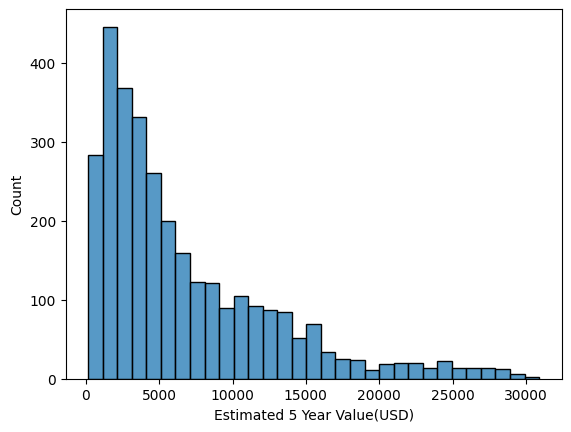

In [14]:
sns.histplot(train_df, x='Estimated 5 Year Value(USD)')

## Data Cleaning

In [15]:
train_df.head(3)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Estimated 5 Year Value(USD)
3304,30,Female,Handbag,Accessories,79,Mississippi,XL,Orange,Fall,4.8,No,Debit Card,Next Day Air,No,No,36,Bank Transfer,Every 3 Months,4424
2756,42,Female,Hat,Accessories,23,Minnesota,L,Violet,Winter,4.1,No,Bank Transfer,Free Shipping,No,No,41,PayPal,Monthly,2323
516,34,Male,Hoodie,Clothing,41,West Virginia,L,Indigo,Fall,2.8,Yes,Cash,2-Day Shipping,Yes,Yes,19,Debit Card,Bi-Weekly,6109


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 3304 to 1061
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          3120 non-null   int64  
 1   Gender                       3120 non-null   object 
 2   Item Purchased               3120 non-null   object 
 3   Category                     3120 non-null   object 
 4   Purchase Amount (USD)        3120 non-null   int64  
 5   Location                     3120 non-null   object 
 6   Size                         3120 non-null   object 
 7   Color                        3120 non-null   object 
 8   Season                       3120 non-null   object 
 9   Review Rating                3120 non-null   float64
 10  Subscription Status          3120 non-null   object 
 11  Payment Method               3120 non-null   object 
 12  Shipping Type                3120 non-null   object 
 13  Discount Applied    

In [17]:
# Turn gender into binary category 0 = Male 1 = Female
train_df['Gender'] = train_df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [18]:
categorical_features = ['Item Purchased', 'Category', 'Size', 'Color', 'Season', 'Payment Method', 'Shipping Type',
                       'Preferred Payment Method', 'Frequency of Purchases']

In [19]:
# Turning other binary features into numeric
train_df['Discount Applied'] = train_df['Discount Applied'].apply(lambda x: 0 if x == 'No' else 1)
train_df['Promo Code Used'] = train_df['Promo Code Used'].apply(lambda x: 0 if x == 'No' else 1)
train_df['Subscription Status'] = train_df['Subscription Status'].apply(lambda x: 0 if x == 'No' else 1)

In [20]:
# Turning categorical features into numeric features
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit encoder
encoded_array = encoder.fit_transform(train_df[categorical_features])
# Get feature names
encoded_features_names = encoder.get_feature_names_out(categorical_features)
# Make a pandas df 
encoded_df = pd.DataFrame(encoded_array, columns=encoded_features_names)
# Concatenate with original data
train_df = pd.concat([train_df.reset_index(drop=True), encoded_df], axis=1)
# Drop categorical features
train_df = train_df.drop(columns=categorical_features)
train_df.drop('Location', axis=1, inplace=True)

## Categorizing 

Now we will try to use clustering algorithms to try and find groups of customers

In [21]:
from sklearn.cluster import KMeans

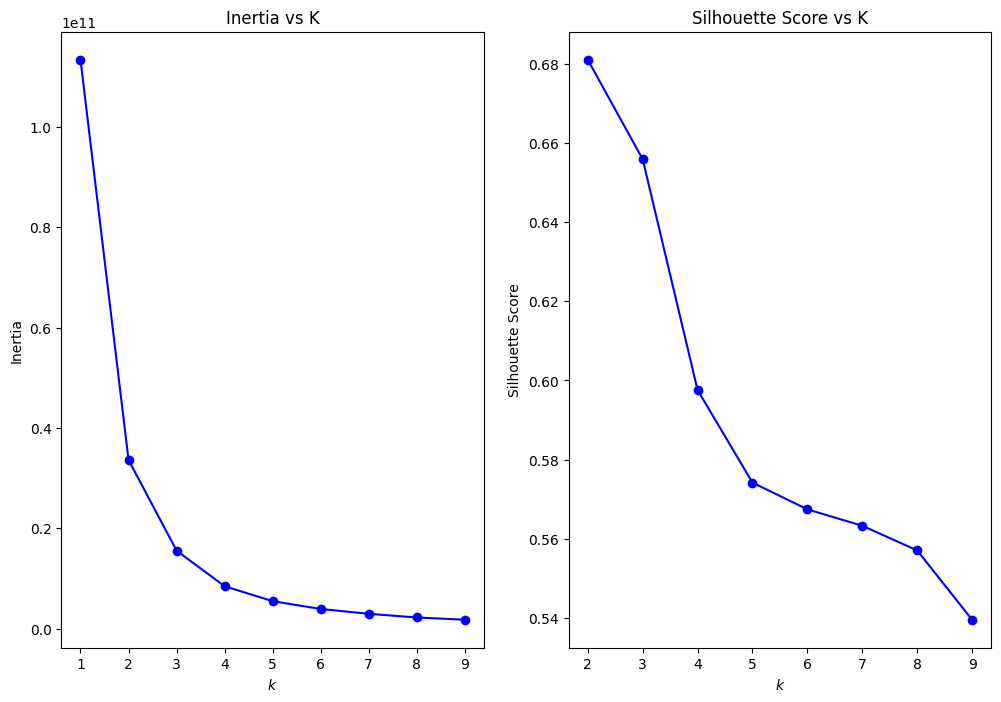

In [22]:
## Firstly lets try and find the the k value that will give us the highest silhouette score and a good inertia
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=1).fit(train_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(train_df, model.labels_)
                     for model in kmeans_per_k[1:]]

## Graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

# Inertia graph
ax1.plot(range(1,10), inertias, "bo-")
ax1.set_xlabel("$k$")
ax1.set_ylabel("Inertia")
ax1.set_title("Inertia vs K")

# Silhouette graph

ax2.plot(range(2,10), silhouette_scores, "bo-")
ax2.set_xlabel("$k$")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score vs K")


plt.show()

According to the graph, having 2 or 3 clusters are worth looking at and anything above seems like a waste of time

In [23]:

two_clu_kmeans = KMeans(n_clusters=2, n_init=15, random_state=1)
two_y_pred = two_clu_kmeans.fit_predict(train_df)

three_clu_kmeans = KMeans(n_clusters=3, n_init=15, random_state=1)
three_y_pred = three_clu_kmeans.fit_predict(train_df)

In [24]:
train_df['Two Cluster Assignment'] = two_y_pred
train_df['Three Cluster Assignment'] = three_y_pred

In [25]:
## Use some graphs to try and make sense of these clusters
def plot_clusters(data, feature_x, feature_y, cluster_column):
    """
    Plots a scatter plot of two features with clusters as the hue.
    
    Parameters:
    - data: pd.DataFrame - The dataset containing the features and cluster assignments.
    - feature_x: str - The name of the feature to plot on the x-axis.
    - feature_y: str - The name of the feature to plot on the y-axis.
    - cluster_column: str - The name of the column containing cluster assignments.
    
    Returns:
    - None (displays the plot).
    """
    # Ensure the cluster column is treated as a categorical variable
    data[cluster_column] = data[cluster_column].astype('category')
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=data,
        x=feature_x,
        y=feature_y,
        hue=cluster_column,
        palette="viridis",
        style=cluster_column,
        s=80
    )
    
    # Add labels and title
    plt.title(f'Clusters by {feature_x} and {feature_y}', fontsize=14)
    plt.xlabel(feature_x, fontsize=12)
    plt.ylabel(feature_y, fontsize=12)
    plt.legend(title="Cluster", fontsize=10)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

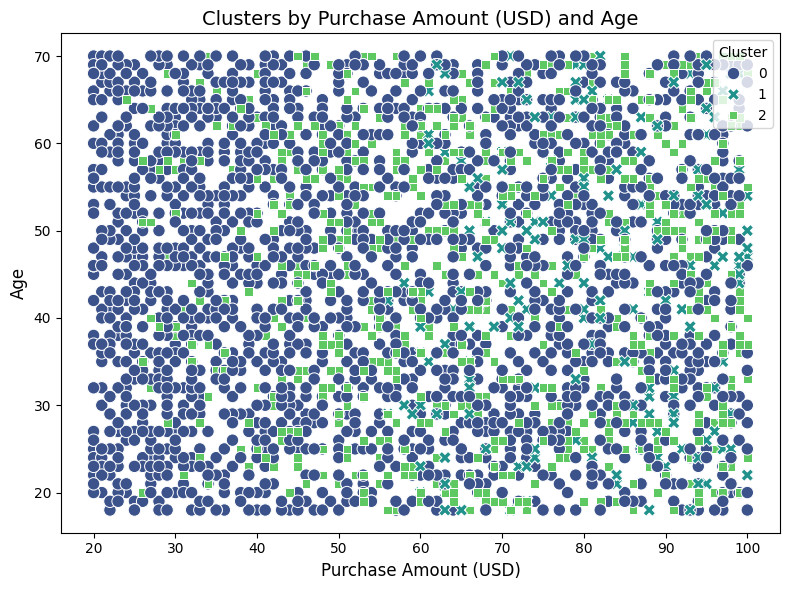

In [26]:
plot_clusters(train_df, 'Purchase Amount (USD)', 'Age', 'Three Cluster Assignment')

In [27]:
train_df.corr()['Two Cluster Assignment'].sort_values()

Frequency of Purchases_Annually         -0.242295
Frequency of Purchases_Every 3 Months   -0.235605
Frequency of Purchases_Quarterly        -0.234380
Frequency of Purchases_Monthly          -0.204015
Size_L                                  -0.048162
                                           ...   
Purchase Amount (USD)                    0.361978
Frequency of Purchases_Weekly            0.518230
Three Cluster Assignment                 0.723964
Estimated 5 Year Value(USD)              0.838723
Two Cluster Assignment                   1.000000
Name: Two Cluster Assignment, Length: 98, dtype: float64

In [28]:
train_df.corr()['Estimated 5 Year Value(USD)'].loc['Two Cluster Assignment']

0.8387231851540536

In [29]:
train_df.corr()['Estimated 5 Year Value(USD)'].loc['Three Cluster Assignment']

0.6711589744750847

While the pattern behind the clusters is very unclear(Probably due to the high dimensionality) the correlation between the target feature and the cluster assignments is very high

## ML Prediction 

In [30]:
def dataframe_transformation(df):
    """
    Function to go from orignial dataframe to new dataframe requried for pipeline

    Parameter: df -> Dataframe to make transformations on. Assumed to be in format exactly like orignial dataset

    Returns: None Changes are made to the df instant passed
    """
    # Resest Index 
    df = df.reset_index(drop=True)
    # Calculate 5 Year estimated value
    amount = df['Purchase Amount (USD)']
    prev_purchases = df['Previous Purchases']
    freq_purchases = df['Frequency of Purchases']
    
    df['Estimated 5 Year Value(USD)'] = (amount * prev_purchases) 
    for i in range(len(freq_purchases)):
        freq = freq_purchases.iloc[i]
        times_per_year = freq_map[freq]
        years = 5
        df.loc[i, 'Estimated 5 Year Value(USD)'] += amount.iloc[i] * times_per_year * years

    # Convert binary features to numeric
    df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
    df['Discount Applied'] = df['Discount Applied'].apply(lambda x: 0 if x == 'No' else 1)
    df['Promo Code Used'] = df['Promo Code Used'].apply(lambda x: 0 if x == 'No' else 1)
    df['Subscription Status'] = df['Subscription Status'].apply(lambda x: 0 if x == 'No' else 1)

    # Encode categorical features
    encoded_array = encoder.transform(df[categorical_features])
    encoded_features_names = encoder.get_feature_names_out(categorical_features)
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_features_names)
    df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
    df = df.drop(columns=categorical_features)
    # Drop not used feature
    df.drop('Location', axis=1, inplace=True)

    # Apply clustering algos
    df['Two Cluster Assignment'] = two_clu_kmeans.predict(df)
    df['Three Cluster Assignment'] = three_clu_kmeans.predict(df.drop('Two Cluster Assignment', axis=1))

    return df

In [31]:
test_df = dataframe_transformation(test_df)

In [32]:
test_df.shape

(390, 98)

In [33]:
val_df = dataframe_transformation(val_df)

In [34]:
val_df.shape

(390, 98)

### Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [36]:
X_train = train_df.drop('Estimated 5 Year Value(USD)', axis=1)
y_train = train_df['Estimated 5 Year Value(USD)']
X_test = test_df.drop('Estimated 5 Year Value(USD)', axis=1)
y_test = test_df['Estimated 5 Year Value(USD)']
X_val = val_df.drop('Estimated 5 Year Value(USD)', axis=1)
y_val = val_df['Estimated 5 Year Value(USD)']

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [84]:
lin_reg = LinearRegression(n_jobs=-1)

In [40]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
lin_reg_pred = lin_reg.predict(X_val)

In [42]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, lin_reg_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, lin_reg_pred))

RMSE score: 
1653.0066375330139
MAE score: 
1199.6705269649292


### Linear Regression with Dimensionality Reduction

In [43]:
from sklearn.decomposition import PCA

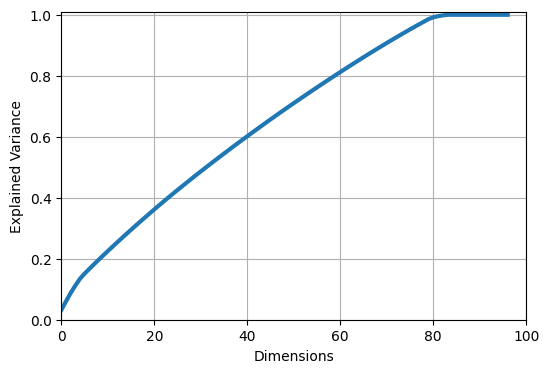

In [44]:
# Finding ideal Number of components
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 

# Graph of Variance vs Components
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1.01])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [45]:
final_pca = PCA(n_components=81, random_state=1)
X_train_reduced = final_pca.fit_transform(X_train)
X_test_reduced = final_pca.transform(X_test)
X_val_reduced = final_pca.transform(X_val)

In [46]:
reduced_lin_reg = LinearRegression()
reduced_lin_reg.fit(X_train_reduced, y_train)
dim_lin_reg_pred = reduced_lin_reg.predict(X_val_reduced)

In [47]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, dim_lin_reg_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, dim_lin_reg_pred))

RMSE score: 
2099.957480640337
MAE score: 
1395.5692306681667


Looks like for linear regression dimensionality reduction lowers the performance

### SVM

In [48]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [49]:
svr = SVR()

In [69]:
param_grid = {
    'C': [1000],               # Regularization parameter
    'kernel': ['linear'],                   # Kernel types
    'gamma': ['scale'],                     # Kernel coefficient (only for 'rbf' and 'poly')
    'degree': [2],                          # Degree of the polynomial kernel (only for 'poly')
    'epsilon': [0.15],                      # Epsilon in the epsilon-SVR model
}

In [51]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1)

In [52]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [100, 500, 1000], 'degree': [2],
                         'epsilon': [0.15], 'gamma': ['scale'],
                         'kernel': ['linear']},
             verbose=1)

In [53]:
best_svr = grid_search.best_estimator_
grid_search.best_params_

{'C': 1000, 'degree': 2, 'epsilon': 0.15, 'gamma': 'scale', 'kernel': 'linear'}

In [54]:
best_svr.fit(X_train, y_train)

SVR(C=1000, degree=2, epsilon=0.15, kernel='linear')

In [55]:
svr_pred = best_svr.predict(X_val)

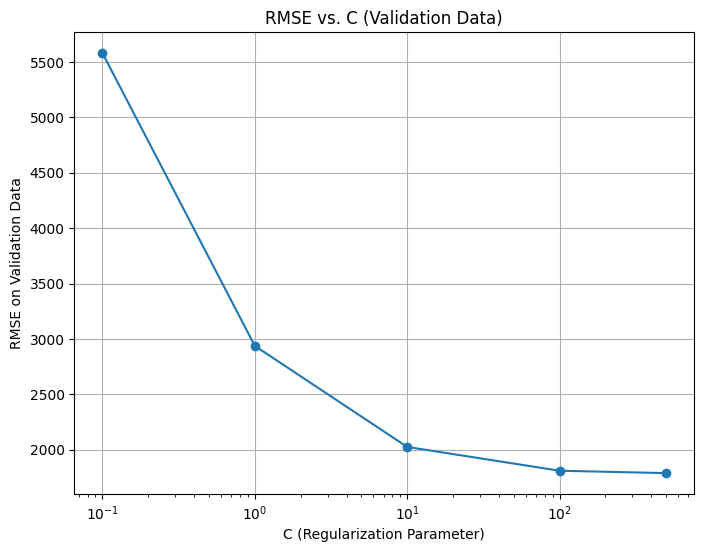

In [56]:
## Using a graph to try and find the C value the performs the best on the val data
# Define a range of C values
C_values = [0.1, 1, 10, 100, 500]
rmse_values = []

for C in C_values:
    # Train the SVR model
    svr = SVR(C=C, kernel='linear', degree=2, epsilon=0.15, gamma='scale') 
    svr.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = svr.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

# Plot RMSE vs. C
plt.figure(figsize=(8, 6))
plt.plot(C_values, rmse_values, marker='o', linestyle='-')
plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('RMSE on Validation Data')
plt.title('RMSE vs. C (Validation Data)')
plt.grid(True)
plt.show()

In [57]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, svr_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, svr_pred))

RMSE score: 
1787.9488510903127
MAE score: 
1019.2350261740764


### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(random_state=1)

In [60]:
param_grid = {
    'n_estimators': [400, 500, 600],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of each tree
    'min_samples_split': [2],  # Minimum samples required to split a node
    'min_samples_leaf': [1],  # Minimum samples required at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'criterion': ['squared_error'],  # Loss function for regression
}

In [61]:
grid_search = GridSearchCV(rfr, param_grid, n_jobs=-1, cv=4, verbose=1)

In [62]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [400, 500, 600]},
             verbose=1)

In [63]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

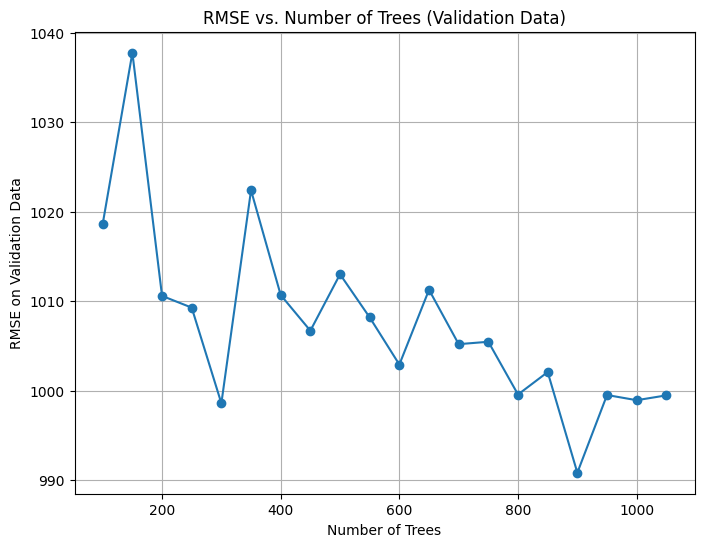

In [64]:
## Use a graph to find the best amount of estimators

ntree_values = list(range(100, 1100, 50))
rmse_values = []

for n in ntree_values:
    # Train the RFR model
    rfr = RandomForestRegressor(n_estimators=n, criterion='squared_error', max_depth=None, max_features='sqrt',
                               min_samples_leaf=1, min_samples_split=2)
    rfr.fit(X_train,y_train)
    
    # Predict on the validation set
    y_pred = rfr.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

# Plot RMSE vs. Number of trees
plt.figure(figsize=(8, 6))
plt.plot(ntree_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE on Validation Data')
plt.title('RMSE vs. Number of Trees (Validation Data)')
plt.grid(True)
plt.show()

According to the graph the optimal number of trees is 450 which goes against the grid search. However I believe the graph is a better source because it measures RMSE on the val data but is trained on test data. This means the 450 trees should give us a model that is not overfitted or underfitted.

In [85]:
best_rfr = RandomForestRegressor(n_estimators=450, criterion='squared_error', max_depth=None, max_features='sqrt',
                                min_samples_leaf=1, min_samples_split=2, n_jobs=-1)

In [66]:
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=450)

In [67]:
rfr_pred = best_rfr.predict(X_val)

In [68]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, rfr_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, rfr_pred))

RMSE score: 
1018.0379413690622
MAE score: 
771.0999886039887


### Voting Regressor

In [70]:
from sklearn.ensemble import VotingRegressor

In [76]:
votereg = VotingRegressor(n_jobs=-1, 
    estimators=[
        ('lr', lin_reg),
        ('svr', best_svr),
        ('rfr', best_rfr)
    ]
)

votereg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('svr',
                             SVR(C=1000, degree=2, epsilon=0.15,
                                 kernel='linear')),
                            ('rfr',
                             RandomForestRegressor(max_features='sqrt',
                                                   n_estimators=450))],
                n_jobs=-1)

In [77]:
votereg_pred = votereg.predict(X_val)

In [78]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, votereg_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, votereg_pred))

RMSE score: 
1289.0522503999669
MAE score: 
798.8042110257594


### Stacking Regressor

In [86]:
from sklearn.ensemble import StackingRegressor

In [87]:
stackreg = StackingRegressor(n_jobs=-1,
    estimators=[
        ('lr', lin_reg),
        ('svr', best_svr),
        ('rfr', best_rfr)
    ], final_estimator=RandomForestRegressor(random_state=1), cv=5)

stackreg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression(n_jobs=-1)),
                              ('svr',
                               SVR(C=1000, degree=2, epsilon=0.15,
                                   kernel='linear')),
                              ('rfr',
                               RandomForestRegressor(max_features='sqrt',
                                                     n_estimators=450,
                                                     n_jobs=-1))],
                  final_estimator=RandomForestRegressor(random_state=1),
                  n_jobs=-1)

In [88]:
stackreg_pred = stackreg.predict(X_val)

In [89]:
print("RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, stackreg_pred)))
print("MAE score: ")
print(mean_absolute_error(y_val, stackreg_pred))

RMSE score: 
460.9501916340158
MAE score: 
312.4908974358974


### AdaBoost Regressor

In [90]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
adareg_rfr = AdaBoostRegressor(estimator=best_rfr, learning_rate=0.5, n_estimators=10, random_state=1)
adareg_svr = AdaBoostRegressor(estimator=best_svr, learning_rate=0.5, n_estimators=10, random_state=1)
adareg_lr = AdaBoostRegressor(estimator=lin_reg, learning_rate=0.5, n_estimators=10, random_state=1)

In [93]:
adareg_rfr.fit(X_train, y_train)
adareg_svr.fit(X_train, y_train)
adareg_lr.fit(X_train, y_train)

AdaBoostRegressor(estimator=LinearRegression(n_jobs=-1), learning_rate=0.5,
                  n_estimators=10, random_state=1)

In [94]:
adareg_rfr_pred = adareg_rfr.predict(X_val)
print("Adareg RFR RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, adareg_rfr_pred)))
print("Adareg RFR MAE score: ")
print(mean_absolute_error(y_val, adareg_rfr_pred))

Adareg RFR RMSE score: 
957.8124145213369
Adareg RFR MAE score: 
745.3955042735041


In [95]:
adareg_svr_pred = adareg_svr.predict(X_val)
print("Adareg SVR RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, adareg_svr_pred)))
print("Adareg SVR MAE score: ")
print(mean_absolute_error(y_val, adareg_svr_pred))

Adareg SVR RMSE score: 
1576.319108827656
Adareg SVR MAE score: 
1155.692053565738


In [96]:
adareg_lr_pred = adareg_lr.predict(X_val)
print("Adareg LR RMSE score: ")
print(np.sqrt(mean_squared_error(y_val, adareg_lr_pred)))
print("Adareg LR MAE score: ")
print(mean_absolute_error(y_val, adareg_lr_pred))

Adareg LR RMSE score: 
1760.1220325502138
Adareg LR MAE score: 
1357.5869416292503


## Final Tests 

In [106]:
models_map = {
    'Linear Reg':lin_reg,
    'Support Vector Reg':best_svr,
    'Random Forest Reg':best_rfr,
    'Voting Reg':votereg,
    'Stacking Reg':stackreg,
    'AdaBoost Reg':adareg_rfr # Random Forest did the best on validation data
}

In [113]:
# For each model, fit the model, then score it based on the test data, then find best model
best_model_rmse = 10_000
best_model_mae = 10_000
best_model = None
for name, model in list(models_map.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} RMSE: {rmse}")
    print(f"{name} MAE: {mae}\n")

    if rmse < best_model_rmse:
        best_model_rmse = rmse
        best_model_mae = mae
        best_model = model

Linear Reg RMSE: 1757.2075820775544
Linear Reg MAE: 1221.2646668696648

Support Vector Reg RMSE: 2082.035723676446
Support Vector Reg MAE: 1128.0244321544083

Random Forest Reg RMSE: 1168.0214504394298
Random Forest Reg MAE: 849.8864102564102

Voting Reg RMSE: 1509.5763526323526
Voting Reg MAE: 870.7887160292616

Stacking Reg RMSE: 600.3113033685532
Stacking Reg MAE: 375.9165384615385

AdaBoost Reg RMSE: 1103.1424227740893
AdaBoost Reg MAE: 827.6169572649571



In [114]:
best_model

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression(n_jobs=-1)),
                              ('svr',
                               SVR(C=1000, degree=2, epsilon=0.15,
                                   kernel='linear')),
                              ('rfr',
                               RandomForestRegressor(max_features='sqrt',
                                                     n_estimators=450,
                                                     n_jobs=-1))],
                  final_estimator=RandomForestRegressor(random_state=1),
                  n_jobs=-1)

The best model for this task was the Stacking Regressor with gave us a RMSE of 600.311 and a MAE of 375.917. Decent results